In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('synthetic_customers.csv')

In [ ]:
data_clean = data.drop(columns=['CustomerID', 'Name', 'Signup Date', 'Notes'])

data_clean['Gender'] = data_clean['Gender'].replace({'M': 'Male', 'F': 'Female'})

mode_gender = data_clean['Gender'].mode()[0]
data_clean['Gender'] = data_clean['Gender'].fillna(mode_gender)

In [ ]:
def convert_income(x):
    if isinstance(x, str):
        if x.strip().lower() == 'forty thousand':
            return 40000
        if x.strip().lower() == 'missing':
            return np.nan
    return x

data_clean['Income ($/year)'] = data_clean['Income ($/year)'].apply(convert_income).astype(float)

def convert_spending(x):
    try:
        return float(x)
    except:
        return np.nan

data_clean['Spending Score'] = data_clean['Spending Score'].apply(convert_spending)

income_median = data_clean['Income ($/year)'].median()
spending_median = data_clean['Spending Score'].median()

data_clean['Income ($/year)'].fillna(income_median, inplace=True)
data_clean['Spending Score'].fillna(spending_median, inplace=True)

data_clean = data_clean.astype({'Age': int, 'Income ($/year)': float, 'Spending Score': float})

C:\Users\KIIT\AppData\Local\Temp\ipykernel_48744\1739190398.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Income ($/year)'].fillna(income_median, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_48744\1739190398.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [ ]:
df_encoded = pd.get_dummies(data_clean, columns=['Gender'], drop_first=True)

num_cols = ['Age', 'Income ($/year)', 'Spending Score']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

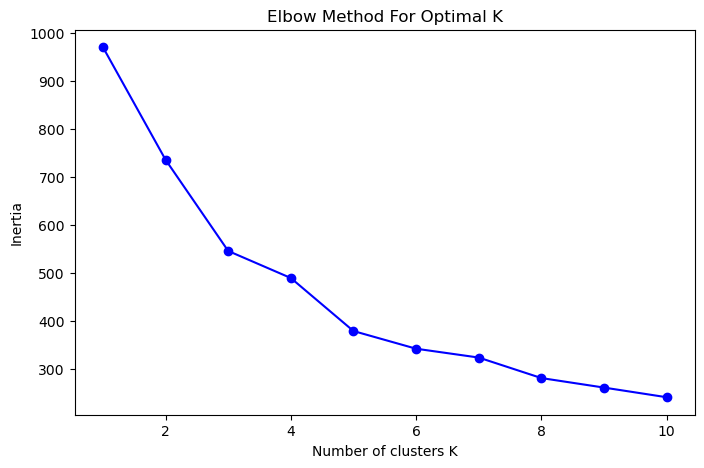

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_encoded)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [ ]:
chosen_k = 4

kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(df_encoded)

data_clean['Cluster'] = kmeans.labels_

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


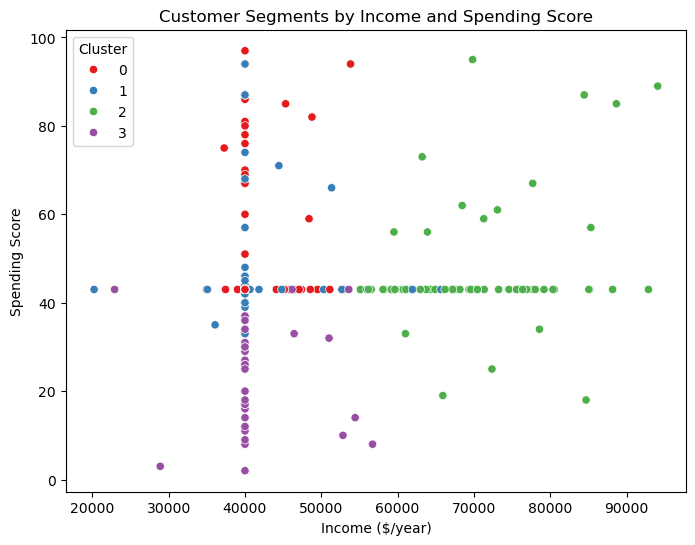

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_clean, x='Income ($/year)', y='Spending Score', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Income and Spending Score')
plt.show()

In [9]:
cluster_counts = data_clean['Cluster'].value_counts().sort_index()
print('Customer count per cluster:')
print(cluster_counts)

Customer count per cluster:
Cluster
0    77
1    91
2    64
3    68
Name: count, dtype: int64


In [10]:
for cluster in cluster_counts.index:
    subset = data_clean[data_clean['Cluster'] == cluster]
    print(f"\nCluster {cluster} info:")
    print(f"Average Income: ${subset['Income ($/year)'].mean():.2f}")
    print(f"Average Spending Score: {subset['Spending Score'].mean():.2f}")
    print(f"Average Age: {subset['Age'].mean():.2f}")



Cluster 0 info:
Average Income: $41088.95
Average Spending Score: 50.84
Average Age: 58.69

Cluster 1 info:
Average Income: $41467.07
Average Spending Score: 45.60
Average Age: 28.47

Cluster 2 info:
Average Income: $70115.89
Average Spending Score: 46.83
Average Age: 47.59

Cluster 3 info:
Average Income: $41170.24
Average Spending Score: 32.46
Average Age: 44.69
